## <div class="alert alert-block alert-info"> Imports<div>

In [1]:
# My Modules
import wrangle_zillow as wr
import explore_zillow as ex
import stats_conclude as sc

# Imports
import env
import os

# Numbers
import pandas as pd 
import numpy as np
import scipy.stats as stats

# Vizzes
import matplotlib.pyplot as plt
import seaborn as sns

# Splitting
from sklearn.model_selection import train_test_split
import sklearn.preprocessing

Load in successful, awaiting commands...


## <div class="alert alert-block alert-info"> Wrangle <div>

In [2]:
# getting/creating the csv
df = wr.get_zillow_261()

CSV file found and loaded


### Second Iteration:

* The cleaning process is below:

In [3]:
# cleaning the data
df_clean = wr.wrangle_zillow_2(df)
df_clean.head()

Returning Zillow's Single Family Residential Homes from 2017
--------------------------------------------
Renamed columns for ease of use
NaN's removed - Percent Original Data Remaining: 99.0
Moved target column to index 0 for ease of assignment
Bed and year data types changed from float to integer
Changed FIPS code to actual county name
Outliers removed: Percent Original Data Remaining: 92.0
 Kept sqft < 5,000
 Property Taxes < $125,000
 Bathrooms > 0 and < 9
 Bedrooms < 7
 Built after 1900
 Assessed Worth outliers out of IQR*1.5


,assessed_worth,bed,bath,sqft,year,property_taxes,county
4,296425.0,4,2.0,3633.0,2005,6941.39,LA
6,847770.0,3,4.0,1620.0,2011,10244.94,LA
7,646760.0,3,2.0,2077.0,1926,7924.68,LA
18,169471.0,3,1.0,1244.0,1950,2532.88,LA
19,233266.0,3,2.0,1300.0,1950,3110.99,LA


## <div class="alert alert-block alert-info"> Split <div>

In [4]:
train, validate, test = wr.split_zillow(df_clean)

Prepared DF: (1983009, 7)
Train: (1269125, 7)
Validate: (317282, 7)
Test: (396602, 7)


In [5]:
# seeing what columns we need to change in order to scale and model
train.head()

,assessed_worth,bed,bath,sqft,year,property_taxes,county
545087,712579.0,5,6.0,3834.0,1966,8295.97,LA
1454113,459000.0,3,2.5,1897.0,1999,5252.16,Ventura
1558662,654550.0,3,2.0,2113.0,1959,7480.36,Orange
1978509,71832.0,4,2.0,1636.0,1964,1391.08,Orange
1098942,430704.0,4,2.0,1638.0,1964,5073.06,Ventura


In [7]:
# savings function returns to variables
X_train, y_train, X_validate, y_validate, X_test, y_test = wr.x_y_train_validate_test(train, validate, test, 'assessed_worth')

Encode successful...
Verifying number of features and target:
Train: ((1269125, 7), (1269125, 1))
Validate: ((317282, 7), (317282, 1))
Test: ((396602, 7), (396602, 1))


In [8]:
# ready for scaling and modeling
X_train.head()

,bed,bath,sqft,year,property_taxes,orange,ventura
545087,5,6.0,3834.0,1966,8295.97,0,0
1454113,3,2.5,1897.0,1999,5252.16,0,1
1558662,3,2.0,2113.0,1959,7480.36,1,0
1978509,4,2.0,1636.0,1964,1391.08,1,0
1098942,4,2.0,1638.0,1964,5073.06,0,1


## <div class="alert alert-block alert-info"> Scale <div>

I have removed some outliers and will utilize the MinMax scaler for this second iteration.

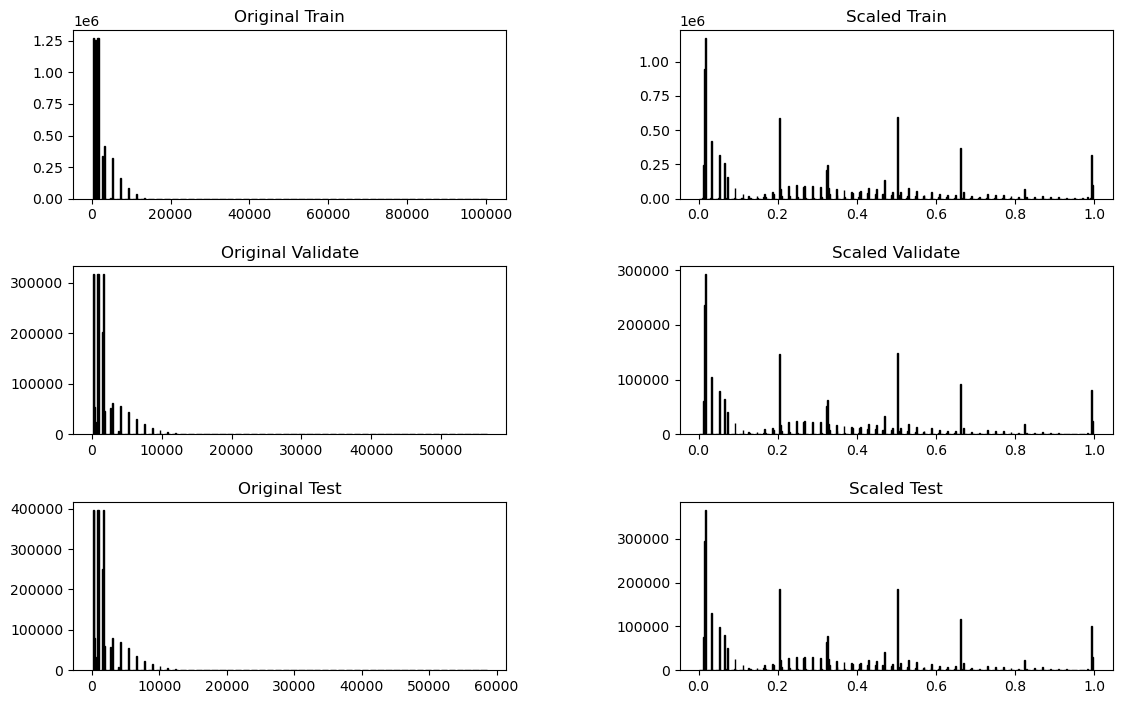

In [9]:
X_train_scaled_mm, X_validate_scaled_mm, X_test_scaled_mm = wr.scale_zillow_2(X_train, X_validate, X_test)

In [10]:
# verfiying scaled df is ready to model
X_train_scaled_mm.head()

,0,1,2,3,4,5,6
0,0.833333,0.733333,0.766907,0.565217,0.082496,0.0,0.0
1,0.500000,0.266667,0.379352,0.852174,0.052168,0.0,1.0
2,0.500000,0.200000,0.422569,0.504348,0.074369,1.0,0.0
3,0.666667,0.200000,0.327131,0.547826,0.013696,1.0,0.0
4,0.666667,0.200000,0.327531,0.547826,0.050383,0.0,1.0


## <div class="alert alert-block alert-info"> Explore <div> 
 
Dataframe = Train
    
---
    
**Target = Assessed Worth**
    
---
    
**Goal:** To predict assessed worth of single family residential properties using data from 2017.
    
---
    
**Questions:**
    
* What features contribute to assessed worth the most?
    * the least?
* Where are the strongest correlations?
* What are my two top features?
    
What kind of linear regression will we use?
    
* Multivariate and simple linear regression

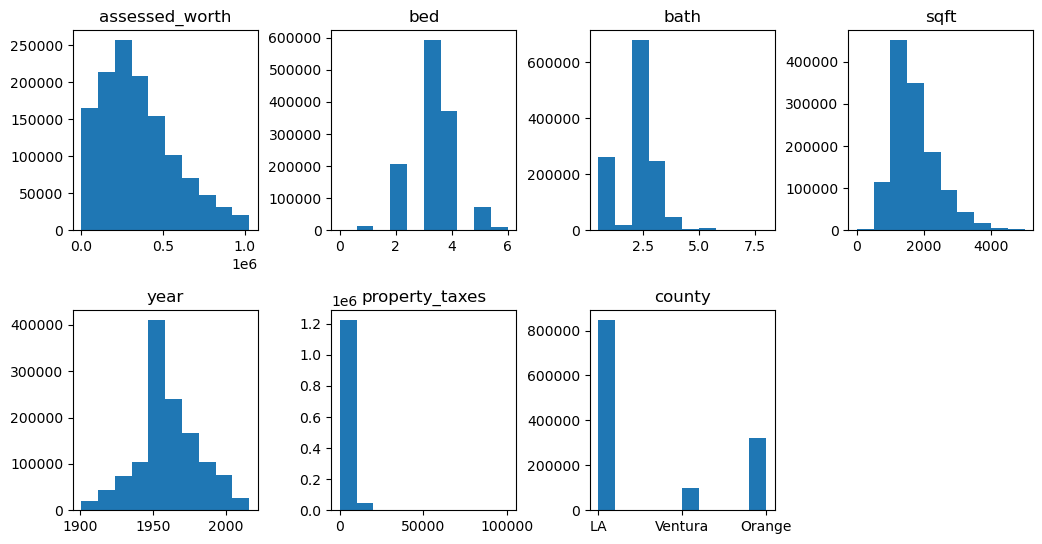

In [11]:
# looking at the hist of the train dataset
ex.hist_zillow(train)

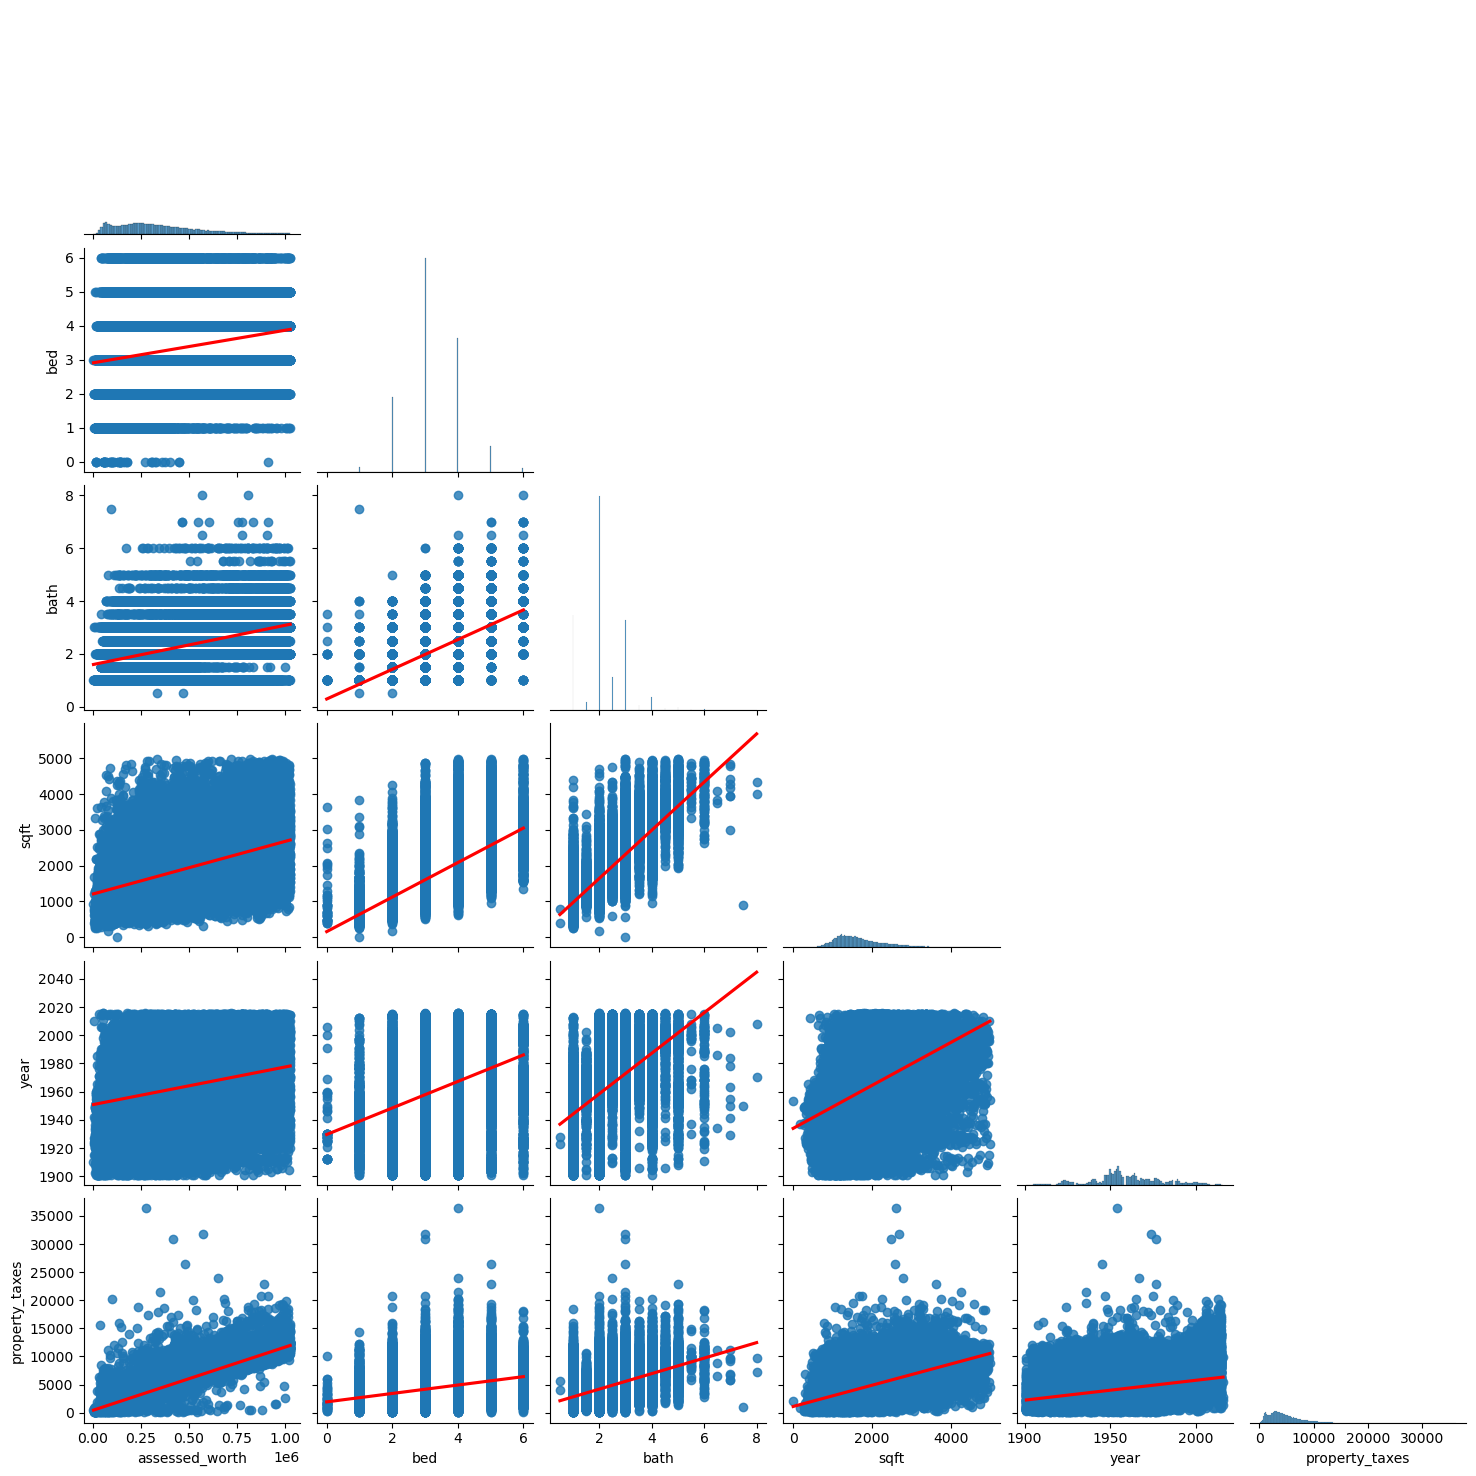

In [12]:
# looking at the pairwise relationships
ex.plot_variable_pairs_120K(train)

<div class="alert alert-block alert-info">  

### Takeaways:

**Target = Assessed Worth**

Low Significance Visually: 
* Year
* Bath
* Bed 
* Sqft (higher than previous but less than most)

Higher Significance Visually:
* Property Taxes

Relationships:

* Bath and Year, Sqft, Property Taxes
* Sqft and Propety Taxes
    
<div> 

Categorical Columns
**COUNTY**
LA         80240
Orange     30461
Ventura     9299
Name: county, dtype: int64
LA         67.0
Orange     25.0
Ventura     8.0
Name: county, dtype: float64 2

HYPOTHESIZE
H_0: county does not affect assessed_worth
H_a: county affects assessed_worth

ANALYZE and SUMMARIZE
chi^2 = 196791.3596
p-value = 0.0 < 0.05
----
We reject the null hypothesis.

VISUALIZE


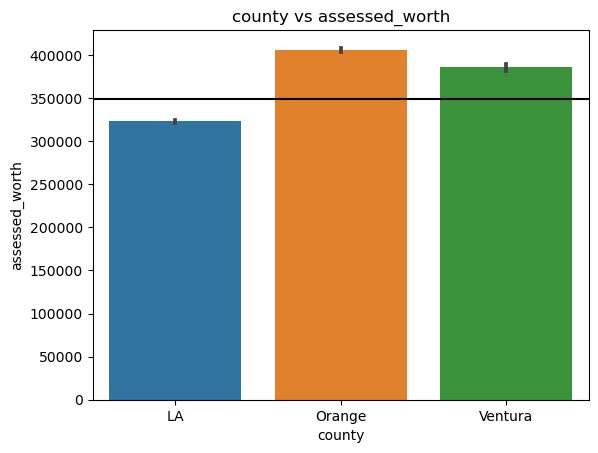

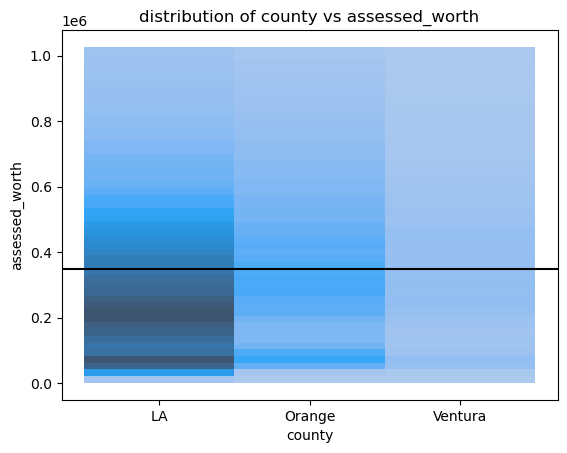

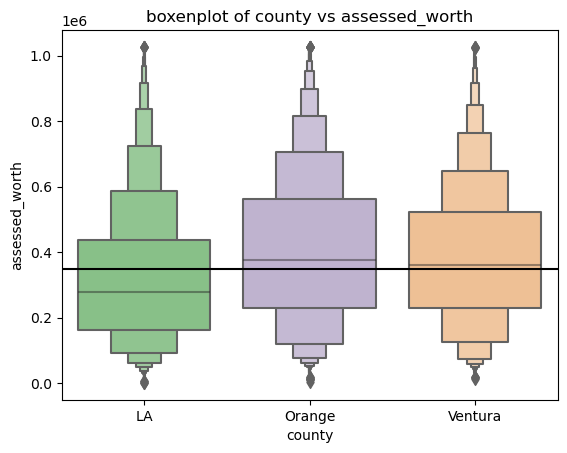

Numerical Columns


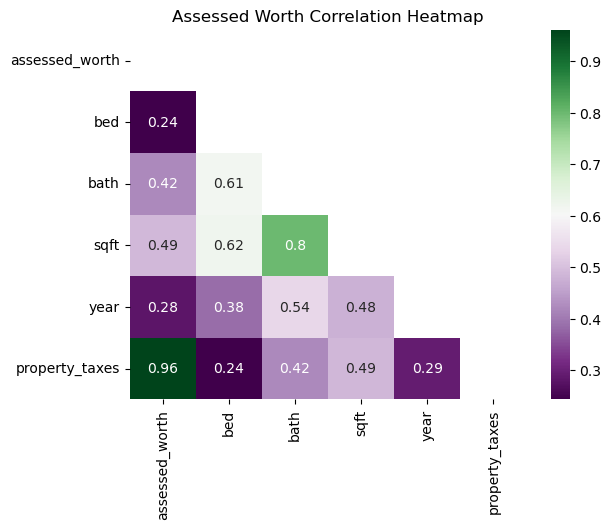

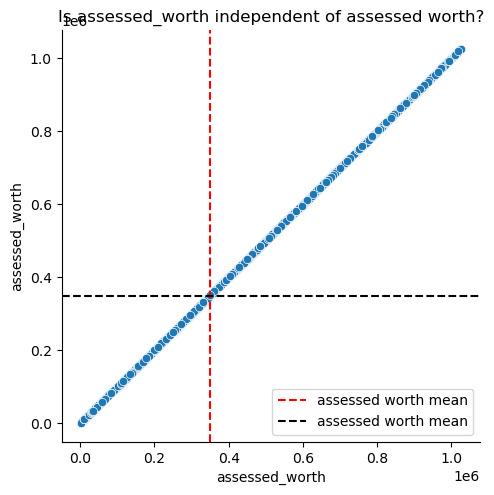

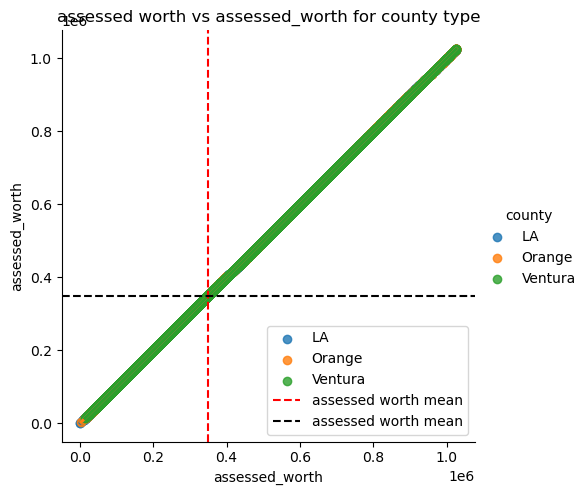

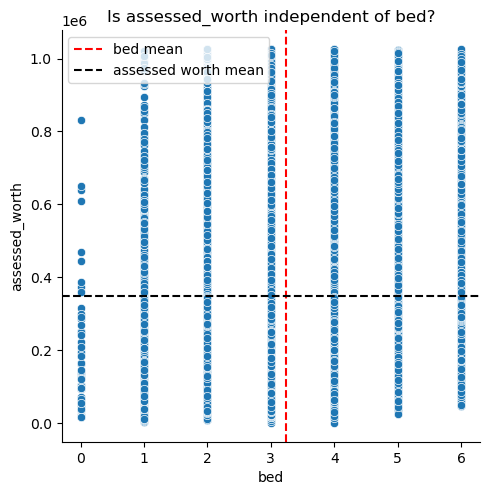

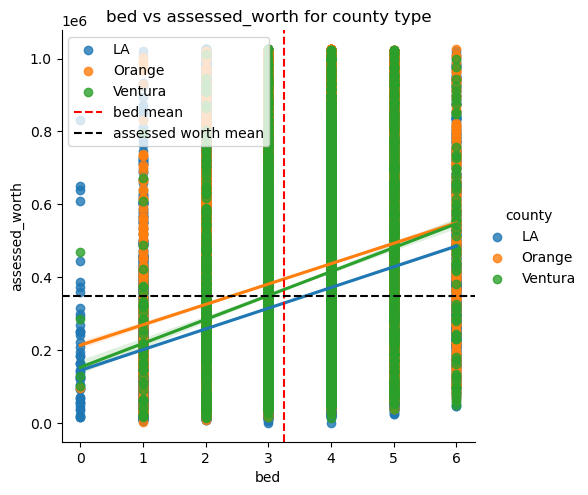

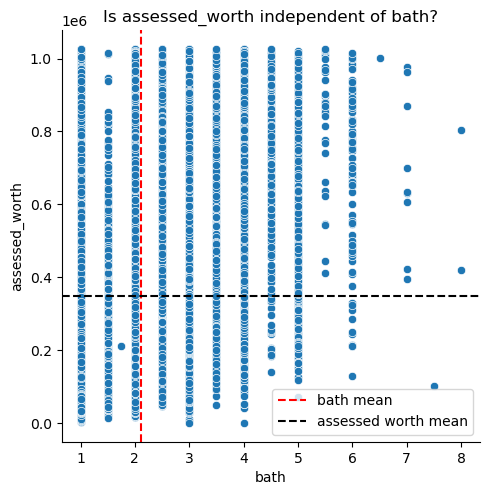

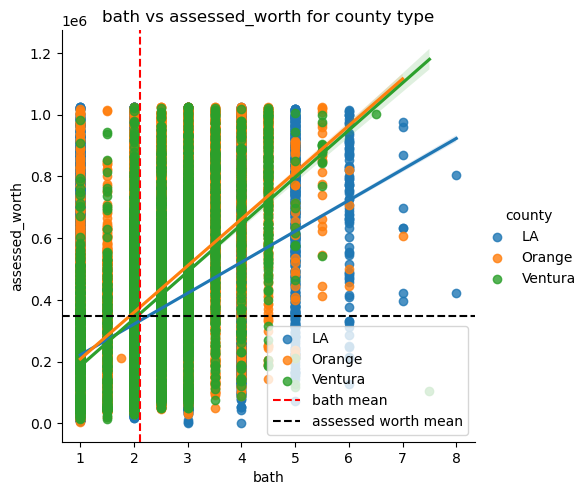

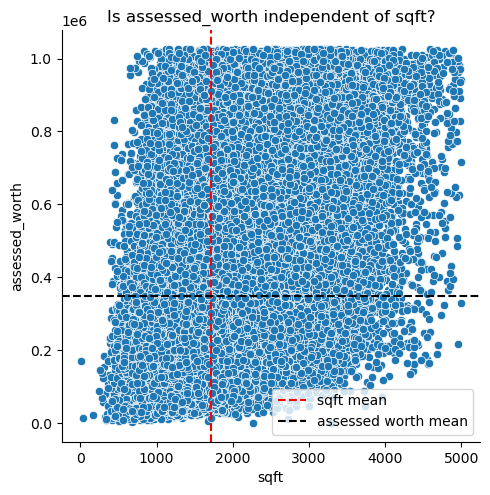

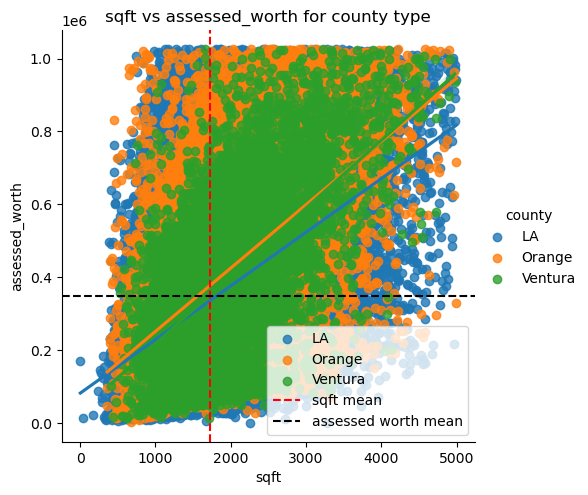

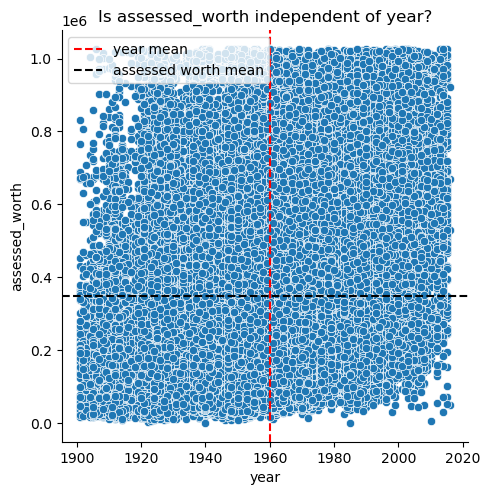

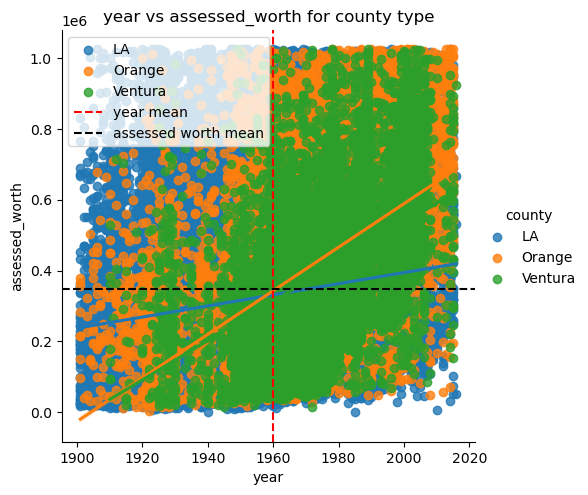

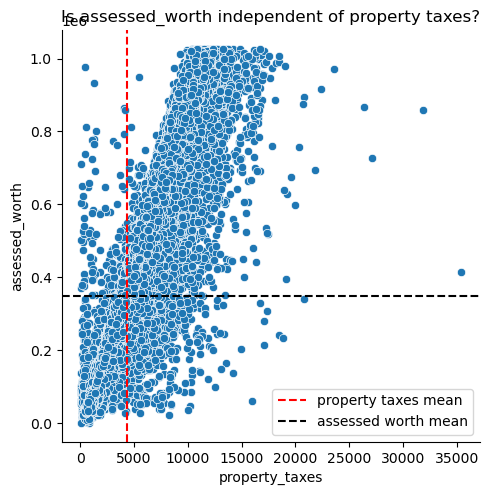

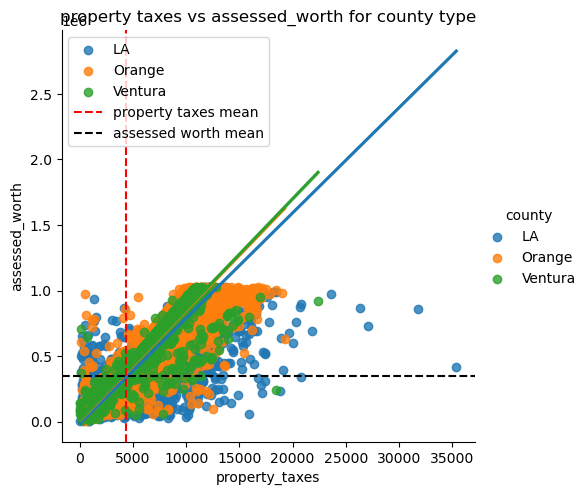

In [13]:
# multivariate analysis
ex.plot_categorical_and_continuous_vars(train.sample(120_000))

<div class="alert alert-block alert-info">  

## Takeaways:

This is the second iteration. I had to cut outliers more so that I could see the actual relationships. There was too much noise before.
    
**Questions:**
* What features contribute to worth the most? `Bath Count and Sqft`
    * the least? `Bed Count and Year`
* Where are the strongest correlations? `Bath Count and Sqft`
* What are my two top features? `Property Taxes (won't use), Bath, Sqft`
    
**Interesting relationships:**
* Bath and Sqft have a correlation of .82!
* Orange County has relatively newer homes with higher values
* LA has older homes with below average value
* LA has older houses worth more
* Avg Sqft is 1,800
    * houses above 4,000 trend up in value only
    * Sqft matters more in Orange and LA county
* As expected, property taxes and assessed worth have a positive relationship at .99
    * Orange has a higher correlation with taxes and worth
    * Higher worth and less taxes
    LA has lower worth and higher taxes
   
    
**Actions for this iteration:**
    
* focus on the audience buying single family residential homes
  
* Cut baths down to 9
* Cut beds down to 7
* Cut sqft down to 5,000
* Cut years below 1900
* Identified and removed Assessed Worth outliers using IQR*1.5 (thank you Amanda!)
* **skew has been addressed**
    
---
    
**What kind of features will I look at engineering?**

* Full and half bath
* Age and Sqft
* Bath and Sqft
* Sqft and property taxes

<div class="alert alert-block alert-info"> 
    
## Stats
    
**Questions:**
* What features contribute to worth the most? `Bath Count and Sqft`
    * the least? `Bed Count and Year`
* Where are the strongest correlations? `Bath Count and Sqft`
* What are my two top features? `Property Taxes (won't use), Bath, Sqft`
    
---
    
**Stats Checklist:**
* Hypothesize
* Visualize
* Analyze (with stats!)
    * discrete - discrete = chi 2
    * discrete - continous = means test
    * continous - continous = correlation
* Summarize
    <div>

In [14]:
train.dtypes

assessed_worth    float64
bed                 int64
bath              float64
sqft              float64
year                int64
property_taxes    float64
county             object
dtype: object

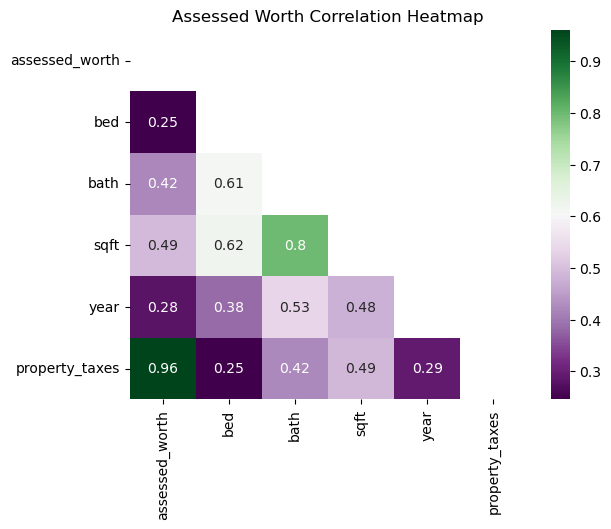

In [15]:
# Correlation
worth_corr = train.corr(method='pearson')
sns.heatmap(worth_corr, cmap='PRGn', annot=True, mask=np.triu(worth_corr))
plt.title(f"Assessed Worth Correlation Heatmap")
plt.show()

<div class="alert alert-block alert-info">
    Questions:
    
* What features contribute to worth the most? Bath `corr = .4` Bed `corr = .25` Year `corr = .28`
    * the least? Bed Count and Year `corr = .4`
* Where are the strongest correlations? Bath Count and Sqft `corr = .8`
* What are my two most correlated features? Property Taxes (won't use), Bath, Sqft
* What are my two lease correlated features? Bed and Year

---

$H_0$: The mean of bedrooms is != to the $\mu$ of home value

$H_a$: The mean of bedrooms is = to the $\mu$ of home value

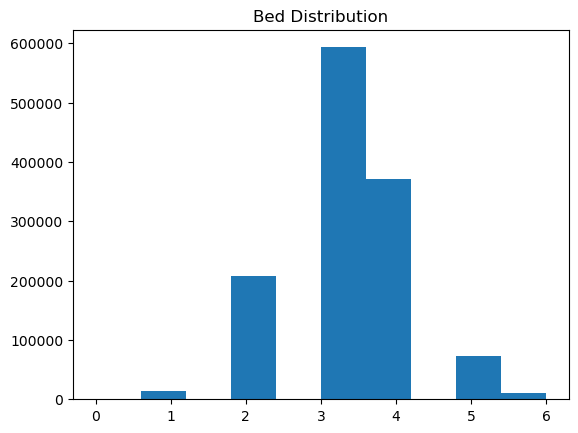

In [16]:
# Visualize
plt.hist(train.bed)
plt.title(f'Bed Distribution')
plt.show()

In [17]:
# Analyze
# Using one sample, two-tailed t-test with assumptions met
sc.conclude_1samp_tt(train.bed, train.assessed_worth.mean())

Assumptions are met: One-Sample, Two-Tailed T-Test successful...
t-stat: -455571691.6847118 > 0?
p-value: 0.0000000000 < 0.05?

----
We fail to reject the null hypothesis.


---

$H_0$: The mean of bathrooms is <= the $\mu$ of home value

$H_a$: The mean of bathrooms is greater than the $\mu$ of home value

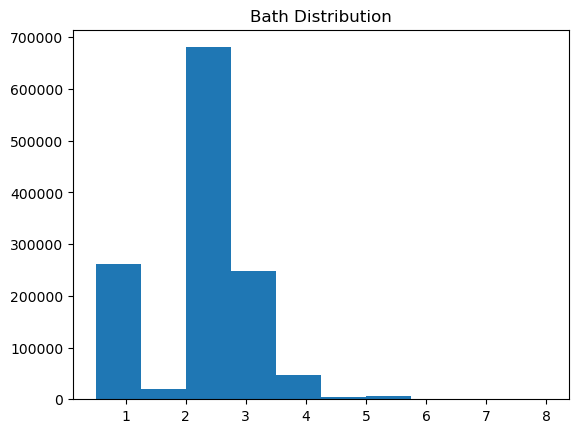

In [18]:
# Visualize
plt.hist(train.bath)
plt.title(f'Bath Distribution')
plt.show()

In [19]:
# Analyze
# Using one sample, left-tailed, t-test with assumptions met
sc.conclude_1samp_lt(train.bath, train.assessed_worth.mean())

Assumptions are met: One-Sample, Left-Tailed T-Test successful...
t-stat: -495955481.62417597 < 0?
p-value: 0.0 < 0.05?

----
We can reject the null hypothesis.


---

$H_0$: The mean of sqft is = the $\mu$ of home value

$H_a$: The mean of sqft is != to the $\mu$ of home value

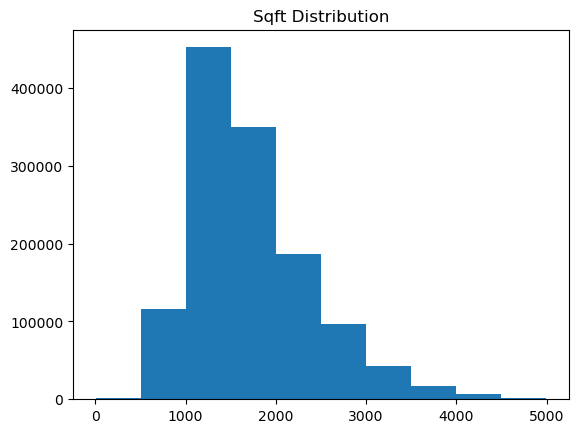

In [20]:
# Visualize
plt.hist(train.sqft)
plt.title(f'Sqft Distribution')
plt.show()

In [21]:
# Analyze
# Using one sample t-test with assumptions met
sc.conclude_1samp_tt(train.sqft, train.assessed_worth.mean())

Assumptions are met: One-Sample, Two-Tailed T-Test successful...
t-stat: -583544.2024873425 > 0?
p-value: 0.0000000000 < 0.05?

----
We fail to reject the null hypothesis.


---

$H_0$: The mean of year is <= the $\mu$ of home value

$H_a$: The mean of year is greater than the $\mu$ of home value

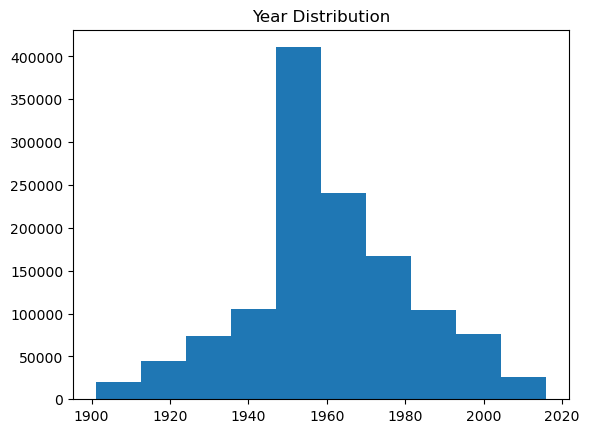

In [22]:
# Visualize
plt.hist(train.year)
plt.title(f'Year Distribution')
plt.show()

In [23]:
# Analyze
# Using one sample t-test with assumptions met
sc.conclude_1samp_lt(train.year, train.assessed_worth.mean())

Assumptions are met: One-Sample, Left-Tailed T-Test successful...
t-stat: -18467445.363128994 < 0?
p-value: 0.0 < 0.05?

----
We can reject the null hypothesis.


---

$H_0$: The mean of property taxes is <= the $\mu$ of home value

$H_a$: The mean of property taxes is > to the $\mu$ of home value

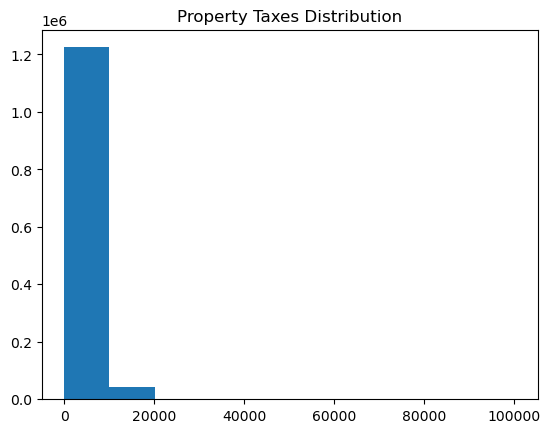

In [24]:
# Visualize
plt.hist(train.property_taxes)
plt.title(f'Property Taxes Distribution')
plt.show()

In [25]:
# Analyze
# Using one sample, left-tailed t-test with assumptions met
sc.conclude_1samp_tt(train.property_taxes, train.assessed_worth.mean())

Assumptions are met: One-Sample, Two-Tailed T-Test successful...
t-stat: -149426.95351720866 > 0?
p-value: 0.0000000000 < 0.05?

----
We fail to reject the null hypothesis.


<div class="alert alert-block alert-info"> 
    
## Takeaways:

What independent variables are correlated with the dependent variable, home value?
    
* All of them are correlated

Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?
    
* They all have a correlation factor

In [26]:
sc.iterate_columns(train)

,assessed_worth,bed,bath,sqft,year,property_taxes,county
545087,712579.0,5,6.0,3834.0,1966,8295.97,LA
1454113,459000.0,3,2.5,1897.0,1999,5252.16,Ventura
1558662,654550.0,3,2.0,2113.0,1959,7480.36,Orange
1978509,71832.0,4,2.0,1636.0,1964,1391.08,Orange
1098942,430704.0,4,2.0,1638.0,1964,5073.06,Ventura
...,...,...,...,...,...,...,...
321518,776666.0,4,3.0,2692.0,2005,8716.16,Orange
623365,540398.0,3,2.0,2067.0,1993,6710.62,Orange
318963,241623.0,3,2.0,1438.0,1962,3171.22,LA
946222,301238.0,3,2.0,1942.0,1931,3707.50,Orange


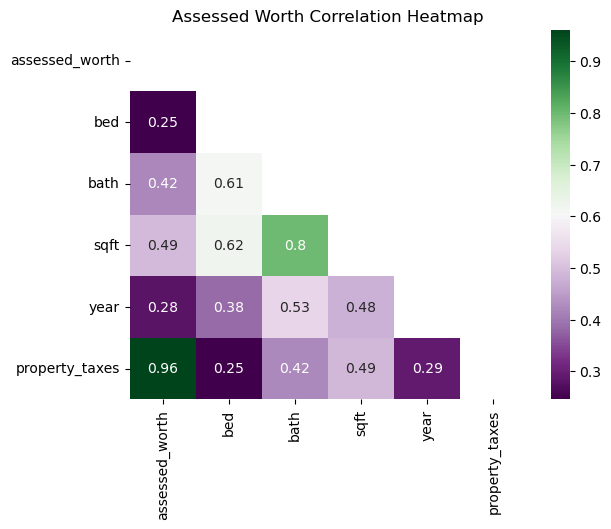

In [27]:
# Correlation
worth_corr = train.corr(method='pearson')
sns.heatmap(worth_corr, cmap='PRGn', annot=True, mask=np.triu(worth_corr))
plt.title(f"Assessed Worth Correlation Heatmap")
plt.show()

<div class="alert alert-block alert-info"> 
    
## Modeling:

#### Fit a linear regression model (ordinary least squares) and compute yhat, predictions of assessed_worth using only sqft.

Plot the residuals for the linear regression model that you made.

Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

What is the amount of variance explained in your model?

Is your model better than the baseline model?

Create a file named evaluate.py that contains the following functions.

* plot_residuals(y, yhat): creates a residual plot
* regression_errors(y, yhat): returns the following values:
    * sum of squared errors (SSE)
    * explained sum of squares (ESS)
    * total sum of squares (TSS)
    * mean squared error (MSE)
    * root mean squared error (RMSE)
* baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
* better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

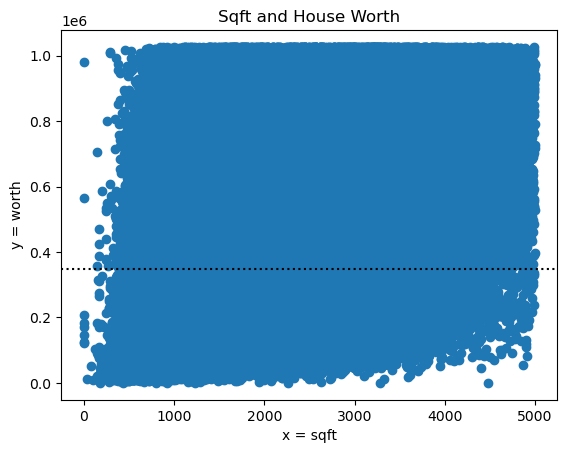

In [102]:
#plot our variables
plt.scatter(train.sqft, train.assessed_worth)

plt.xlabel('x = sqft')
plt.ylabel('y = worth')
plt.axhline(train.assessed_worth.mean(), ls=':', color='black')
plt.title(f"Sqft and House Worth")
plt.show()

In [43]:
from sklearn.linear_model import LinearRegression

# make and fit the thing
model = LinearRegression().fit(train[['sqft']], train[['assessed_worth']])

# use the thing
predictions = model.predict(train[['sqft']])
predictions

array([[693638.54812354],
       [377885.00576909],
       [413095.51952674],
       ...,
       [303062.6640341 ],
       [385220.5294686 ],
       [262472.76623014]])

In [83]:
# setting yhat baseline
train['yhat_baseline'] = train.assessed_worth.mean()
train.head()

,assessed_worth,bed,bath,sqft,year,property_taxes,county,yhat_baseline,yhat,baseline_residual,residuals,baseline_residual_2,residual_2
545087,712579.0,5,6.0,3834.0,1966,8295.97,LA,349112.586696,693638.548124,363466.413304,18940.451876,1.321078e+11,3.587407e+08
1454113,459000.0,3,2.5,1897.0,1999,5252.16,Ventura,349112.586696,377885.005769,109887.413304,81114.994231,1.207524e+10,6.579642e+09
1558662,654550.0,3,2.0,2113.0,1959,7480.36,Orange,349112.586696,413095.519527,305437.413304,241454.480473,9.329201e+10,5.830027e+10
1978509,71832.0,4,2.0,1636.0,1964,1391.08,Orange,349112.586696,335338.968312,-277280.586696,-263506.968312,7.688452e+10,6.943592e+10
1098942,430704.0,4,2.0,1638.0,1964,5073.06,Ventura,349112.586696,335664.991587,81591.413304,95039.008413,6.657159e+09,9.032413e+09


In [44]:
# setting yhat
train['yhat'] = predictions

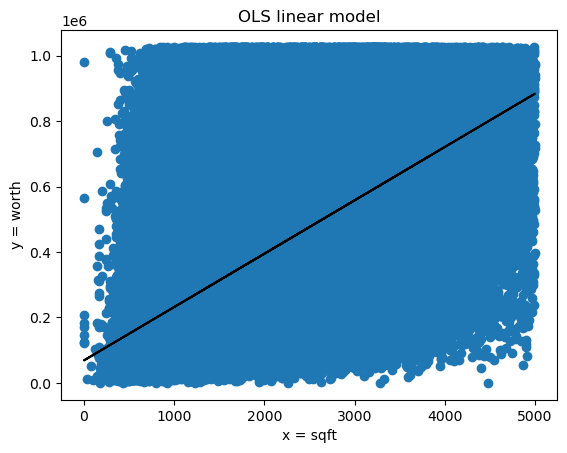

In [42]:
# visualize the line of best fit from OLS linear model

#scatter is my actuals
plt.scatter(train.sqft, train.assessed_worth)

#lineplot is my regression line
plt.plot(train.sqft, train.yhat, color='black')


plt.xlabel('x = sqft')
plt.ylabel('y = worth')
plt.title('OLS linear model')
plt.show()

### Regression Metrics

#### Vocabulary

Residual: error (change in actual and predicted) <br>
SSE: sum of squared error<br>
MSE: mean squared error<br>
RMSE: root mean squared error<br>

### Residual Error

In [46]:
# residual = actual - predicted
train['baseline_residual'] = train.assessed_worth - train.yhat_baseline
train.head()

,assessed_worth,bed,bath,sqft,year,property_taxes,county,yhat_baseline,yhat,baseline_residual
545087,712579.0,5,6.0,3834.0,1966,8295.97,LA,349112.586696,693638.548124,363466.413304
1454113,459000.0,3,2.5,1897.0,1999,5252.16,Ventura,349112.586696,377885.005769,109887.413304
1558662,654550.0,3,2.0,2113.0,1959,7480.36,Orange,349112.586696,413095.519527,305437.413304
1978509,71832.0,4,2.0,1636.0,1964,1391.08,Orange,349112.586696,335338.968312,-277280.586696
1098942,430704.0,4,2.0,1638.0,1964,5073.06,Ventura,349112.586696,335664.991587,81591.413304


In [68]:
# residual = actual - predicted
train['residuals'] = train.assessed_worth - train.yhat
train.head()

,assessed_worth,bed,bath,sqft,year,property_taxes,county,yhat_baseline,yhat,baseline_residual,residuals,baseline_residual_2,residual_2
545087,712579.0,5,6.0,3834.0,1966,8295.97,LA,349112.586696,693638.548124,363466.413304,18940.451876,1.321078e+11,3.587407e+08
1454113,459000.0,3,2.5,1897.0,1999,5252.16,Ventura,349112.586696,377885.005769,109887.413304,81114.994231,1.207524e+10,6.579642e+09
1558662,654550.0,3,2.0,2113.0,1959,7480.36,Orange,349112.586696,413095.519527,305437.413304,241454.480473,9.329201e+10,5.830027e+10
1978509,71832.0,4,2.0,1636.0,1964,1391.08,Orange,349112.586696,335338.968312,-277280.586696,-263506.968312,7.688452e+10,6.943592e+10
1098942,430704.0,4,2.0,1638.0,1964,5073.06,Ventura,349112.586696,335664.991587,81591.413304,95039.008413,6.657159e+09,9.032413e+09


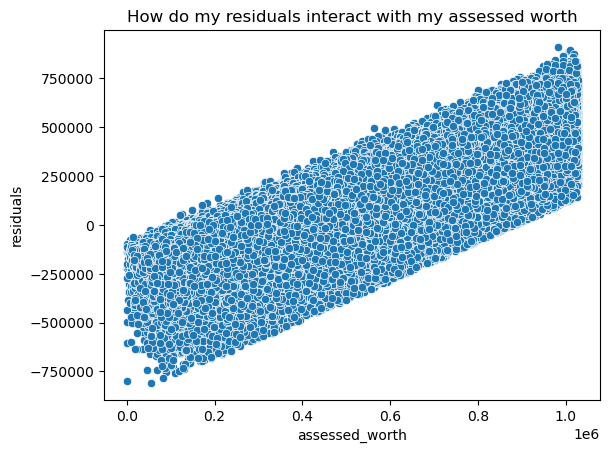

In [69]:
sns.scatterplot(data=train, y='residuals', x='assessed_worth')
plt.title('How do my residuals interact with my assessed worth')
plt.show()

### SSE

In [48]:
# the difference between yhat and target, just squared
train['baseline_residual_2'] = train.baseline_residual ** 2
train['residual_2'] = train.residuals **2 
train.head()

,assessed_worth,bed,bath,sqft,year,property_taxes,county,yhat_baseline,yhat,baseline_residual,residuals,baseline_residual_2,residual_2
545087,712579.0,5,6.0,3834.0,1966,8295.97,LA,349112.586696,693638.548124,363466.413304,18940.451876,1.321078e+11,3.587407e+08
1454113,459000.0,3,2.5,1897.0,1999,5252.16,Ventura,349112.586696,377885.005769,109887.413304,81114.994231,1.207524e+10,6.579642e+09
1558662,654550.0,3,2.0,2113.0,1959,7480.36,Orange,349112.586696,413095.519527,305437.413304,241454.480473,9.329201e+10,5.830027e+10
1978509,71832.0,4,2.0,1636.0,1964,1391.08,Orange,349112.586696,335338.968312,-277280.586696,-263506.968312,7.688452e+10,6.943592e+10
1098942,430704.0,4,2.0,1638.0,1964,5073.06,Ventura,349112.586696,335664.991587,81591.413304,95039.008413,6.657159e+09,9.032413e+09


In [50]:
#add the residuals together
SSE_baseline = train.baseline_residual_2.sum()
SSE = train.residual_2.sum()
print("SSE_baseline =", "{:.1f}".format(SSE_baseline))
print('SSE =', "{:.1f}".format(SSE))

SSE_baseline = 62722805908193400.0
SSE = 47554467254996440.0


In [108]:
# shorthand
# dollars squared
SSE = MSE * len(train)
SSE

4.755446725499644e+16

### MSE

In [51]:
#calcaluate MSE
MSE_baseline = SSE_baseline/len(train)
MSE = SSE/len(train)

print(f"MSE baseline = {MSE_baseline:.1f}")
print(f'MSE = {MSE:.1f}')

MSE baseline = 49422086798.5
MSE = 37470278542.3


In [70]:
from sklearn.metrics import mean_squared_error

In [95]:
# shorthand
MSE = mean_squared_error(train.assessed_worth, train.yhat)
MSE

37470278542.299965

### RMSE

In [79]:
# calculate RMSE
RMSE_baseline = MSE_baseline ** .5
RMSE = MSE ** .5

print("RMSE baseline = ", "{:.2f}".format(RMSE_baseline))
print("RMSE = ", "{:.2f}".format(RMSE))

RMSE baseline =  222310.79
RMSE =  193572.41


In [107]:
# shorthand
# How much error we have in one housing price!
RMSE = MSE ** .5
RMSE.round(2)

193572.41

### ESS

In [81]:
ESS = sum((train.yhat - train.assessed_worth.mean())**2)
ESS

1.5168338653204976e+16

In [91]:
TSS = ESS + SSE
TSS

6.2722805908201416e+16

In [106]:
# another way to calculate R2
(ESS/TSS).round(4)

0.2418

In [92]:
MSE_baseline = mean_squared_error(train.assessed_worth, train.yhat_baseline)
MSE_baseline

49422086798.5371

In [93]:
SSE_baseline = MSE_baseline * len(train)
SSE_baseline

6.27228059081934e+16

In [94]:
RMSE_baseline = MSE_baseline ** .5
RMSE_baseline.round(2)

222310.79

### Python Code

In [101]:
if SSE < SSE_baseline:
    print(f"I beat baseline!")
else:
    print(f"Model not better than baseline.")

I beat baseline!


### Variance

### R2

In [53]:
# import r2
from sklearn.metrics import r2_score

In [77]:
# use r2_score
round(r2_score(train.assessed_worth, train.yhat),4)

0.2418

### Is my model better than the baseline model?

My model is better than baseline, however, it's not that great.